In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

create dummy model by just creating a column that predicts eg 1 every time (majority class)
downscale the training data, for feasability
- then use the correct distribution in real world for testing (and eval i think)


In [19]:
df1 = pd.read_parquet('/work/SarahHvidAndersen#6681/DataScience_project/data/CIS-IDS2017/Benign-Monday-no-metadata.parquet')
df2 = pd.read_parquet('/work/SarahHvidAndersen#6681/DataScience_project/data/CIS-IDS2017/Botnet-Friday-no-metadata.parquet')
df3 = pd.read_parquet('/work/SarahHvidAndersen#6681/DataScience_project/data/CIS-IDS2017/Bruteforce-Tuesday-no-metadata.parquet')
df4 = pd.read_parquet('/work/SarahHvidAndersen#6681/DataScience_project/data/CIS-IDS2017/DDoS-Friday-no-metadata.parquet')
df5 = pd.read_parquet('/work/SarahHvidAndersen#6681/DataScience_project/data/CIS-IDS2017/DoS-Wednesday-no-metadata.parquet')
df6 = pd.read_parquet('/work/SarahHvidAndersen#6681/DataScience_project/data/CIS-IDS2017/Infiltration-Thursday-no-metadata.parquet')
df7 = pd.read_parquet('/work/SarahHvidAndersen#6681/DataScience_project/data/CIS-IDS2017/Portscan-Friday-no-metadata.parquet')
df8 = pd.read_parquet('/work/SarahHvidAndersen#6681/DataScience_project/data/CIS-IDS2017/WebAttacks-Thursday-no-metadata.parquet')

df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8], axis=0, ignore_index=True)

In [2]:
df = pd.read_csv('/work/SarahHvidAndersen#6681/DataScience_project/data/CIS-IDS2017.csv')

print(len(df))
duplicate_count = df.duplicated().sum()
print(f"{duplicate_count} duplicate entries have been found in the dataset\n")
# Remove duplicates
df.drop_duplicates(inplace=True) 
print(len(df))
df.columns

2231806
0 duplicate entries have been found in the dataset

2231806


Index(['Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Fwd Packets Length Total',
       'Bwd Packets Length Total', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Fla

In [36]:
df = pd.read_csv('/work/SarahHvidAndersen#6681/DataScience_project/data/CIS-IDS2017.csv')

In [13]:
df['Label'].value_counts()

Label
Benign                        1977318
DoS Hulk                       172846
DDoS                           128014
DoS GoldenEye                   10286
FTP-Patator                      5931
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
PortScan                         1956
Web Attack � Brute Force         1470
Bot                              1437
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [3]:
df['Attack'] = df['Label'].apply(lambda x: 0 if "Benign" in x else 1)

In [11]:
df['Label'].value_counts()

Label
Benign                        1895314
DoS Hulk                       172846
DDoS                           128014
DoS GoldenEye                   10286
FTP-Patator                      5931
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
PortScan                         1956
Web Attack � Brute Force         1470
Bot                              1437
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

### Downscaling and splitting the data

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# Randomly split data into temporary training + holdout set for eval/test
temp_train_df, holdout_df = train_test_split(df, test_size=0.6, random_state=42, stratify=df['Label'])
import pandas as pd

# Assuming temp_train_df is already defined and is the dataset we're downsizing

# Step 1: Keep all instances of labels with fewer than 2000 examples
rare_labels_df = temp_train_df.groupby('Label').filter(lambda x: len(x) < 2000)

# Step 2: Sample 30,000 'Benign' rows
benign_df = temp_train_df[temp_train_df['Label'] == 'Benign'].sample(n=30000, random_state=42)

# Step 3: Fill out the remaining rows to reach 60,000 total
# First, calculate how many rows we still need
current_count = len(rare_labels_df) + 30000
rows_needed = 60000 - current_count

# Get the remaining data to sample from, excluding 'Benign' and rare labels
remaining_labels = temp_train_df[~temp_train_df['Label'].isin(rare_labels_df['Label'].unique()) & (temp_train_df['Label'] != 'Benign')]

# Sample the needed rows from the remaining data
additional_df = remaining_labels.sample(n=rows_needed, random_state=42)

# Combine all parts into the final train_df
train_df = pd.concat([rare_labels_df, benign_df, additional_df])

# Debugging to check counts
print("Training Data Size:", train_df.shape)
print(train_df['Label'].value_counts())

Training Data Size: (60000, 79)
Label
Benign                        30000
DoS Hulk                      14004
DDoS                          10233
SSH-Patator                    1288
DoS GoldenEye                   839
PortScan                        782
Web Attack � Brute Force        588
Bot                             575
FTP-Patator                     521
DoS slowloris                   445
DoS Slowhttptest                436
Web Attack � XSS                261
Infiltration                     14
Web Attack � Sql Injection        9
Heartbleed                        5
Name: count, dtype: int64


In [49]:
from sklearn.model_selection import train_test_split

# Assuming 'holdout_df' is the data remaining after splitting off the training set
# Determine minimum instances to ensure rare labels are represented
min_instances_per_label = 25

# Identify rare labels based on your specified minimum instances
label_counts = holdout_df['Label'].value_counts()
rare_labels = label_counts[label_counts < min_instances_per_label].index.tolist()
rare_labels_df = holdout_df[holdout_df['Label'].isin(rare_labels)]

# Remove rare labels from the main dataset for stratified sampling
remaining_df = holdout_df[~holdout_df['Label'].isin(rare_labels)]

# Stratify remaining data into eval and test datasets, and randomly sample to downsize
remaining_eval_df, remaining_test_df = train_test_split(remaining_df, test_size=0.5, stratify=remaining_df['Label'], random_state=42)
remaining_eval_df = remaining_eval_df.sample(n=29980, random_state=42)
remaining_test_df = remaining_test_df.sample(n=29980, random_state=42)

# Include rare labels, dividing them approximately evenly between eval and test
rare_eval_df = rare_labels_df.sample(frac=0.5, random_state=42)
rare_test_df = rare_labels_df.drop(rare_eval_df.index)

# Combine and sample to the desired size
eval_df = pd.concat([remaining_eval_df, rare_eval_df])
test_df = pd.concat([remaining_test_df, rare_test_df])

print("Evaluation Data Size:", eval_df.shape)
print(eval_df['Label'].value_counts())
print("Testing Data Size:", test_df.shape)
print(test_df['Label'].value_counts())

Evaluation Data Size: (30000, 79)
Label
Benign                        25518
DoS Hulk                       2304
DDoS                           1703
DoS GoldenEye                   133
FTP-Patator                      74
DoS slowloris                    67
DoS Slowhttptest                 66
SSH-Patator                      34
Bot                              30
PortScan                         23
Web Attack � Brute Force         23
Infiltration                     12
Web Attack � Sql Injection        6
Web Attack � XSS                  5
Heartbleed                        2
Name: count, dtype: int64
Testing Data Size: (30000, 79)
Label
Benign                        25432
DoS Hulk                       2322
DDoS                           1732
DoS GoldenEye                   139
FTP-Patator                      76
DoS slowloris                    71
DoS Slowhttptest                 68
SSH-Patator                      48
PortScan                         30
Bot                              

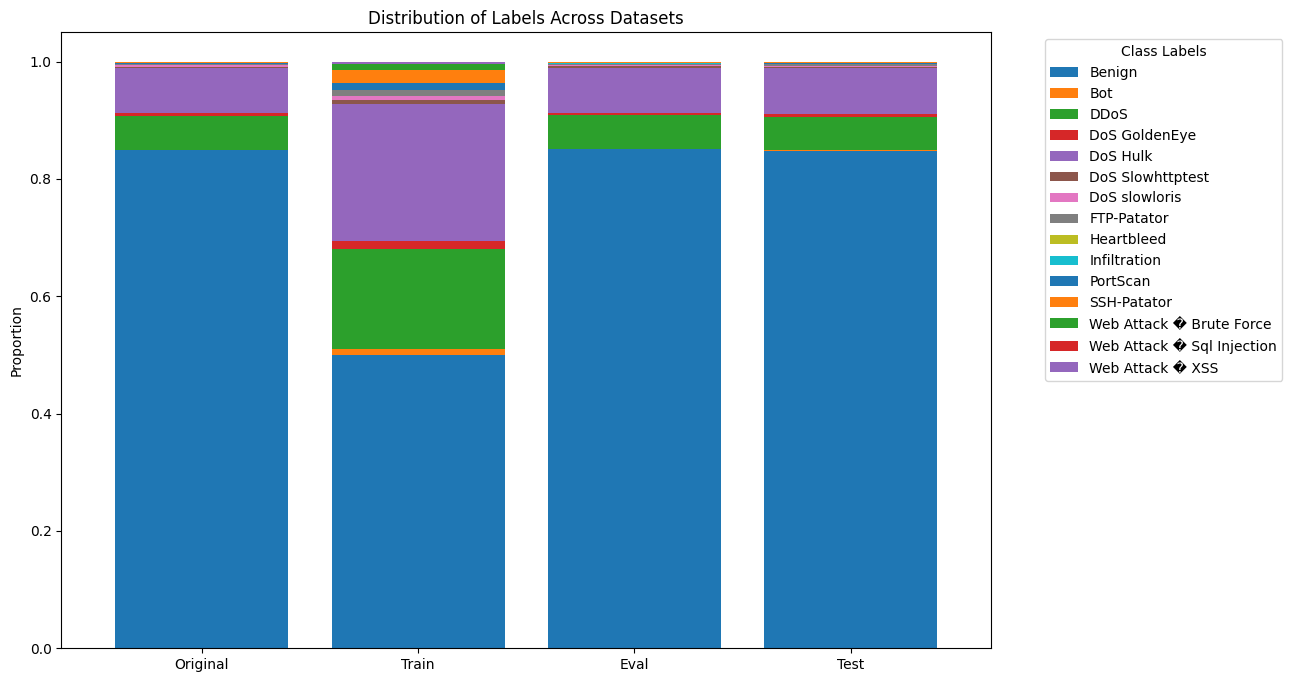

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_correct_grouped_stacked_distribution(df_list, df_names):
    """
    Plots a grouped stacked bar chart where each bar represents a dataset and the stacks represent the distribution of classes.
    
    Parameters:
    - df_list: A list of dataframes to plot.
    - df_names: A list of names for these dataframes.
    """
    # Prepare data for plotting
    data_for_plotting = {}
    for df, name in zip(df_list, df_names):
        # Normalize label counts to get distribution and convert to dictionary
        data_for_plotting[name] = df['Label'].value_counts(normalize=True).sort_index()

    # Creating a DataFrame from the dictionary and then transposing it
    final_df = pd.DataFrame(data_for_plotting).T
    final_df.fillna(0, inplace=True)  # Fill missing values with 0

    # Plotting
    ax = final_df.plot(kind='bar', stacked=True, figsize=(12, 8), width=0.8)
    ax.set_ylabel('Proportion')
    ax.set_title('Distribution of Labels Across Datasets')
    plt.xticks(rotation=0)  # Keep the labels horizontal for better readability
    plt.legend(title='Class Labels', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Example usage assuming you have dataframes: original_df, train_df, eval_df, test_df
plot_correct_grouped_stacked_distribution([df, train_df, eval_df, test_df], ['Original', 'Train', 'Eval', 'Test'])


In [58]:
train_df.to_csv('/work/SarahHvidAndersen#6681/DataScience_project/data/train_df.csv', index=False)
eval_df.to_csv('/work/SarahHvidAndersen#6681/DataScience_project/data/eval_df.csv', index=False)
test_df.to_csv('/work/SarahHvidAndersen#6681/DataScience_project/data/test_df.csv', index=False)